In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [18]:
data = pd.DataFrame({'Nom': ['Seck','Drame', 'ALI','Bousso', 'BELLO', 'Dieng', 'GADIAGA', 'Cuvet', 'Laube', 'Alioune', 'Dulot','Bayes', 'Lane', 'Cuinet', 'Ballo', 'Gauthier', 'Braye', 'Germon', 'Cariau'],
              'Prénom': ['Ismaila','Cheikhna', 'Nour Mahamat','Marietou', 'Soboure', 'Abdou Rahmane', 'Serigne Dame', 'Olivier', 'Fred', 'Bakayoko', 'Nicola', 'Guillaume', 'Mathilde', 'Léo', 'Leilah', 'Quentin', 'Coline', 'Véronique', 'Benjamin'],
              'Ville': ['Lyon','Lyon', 'Lyon','Lyon', 'Lyon', 'Lyon', 'Lyon', 'Amiens', 'Toulouse', 'Lyon', 'Anger', 'Tours', 'Paris', 'Brest', 'Nante', 'Lyon', 'Lyon', 'Tours', 'Paris'],
              'Garantie Logement': ['Garantie visale et GarantMe avec garant physique aussi','Pas de garant', 'garant physique',' garantie Visale', 'garant physique', 'garant physique', 'GarantMe', 'Garantie Visale', 'Visale', 'Visale', 'Visale', 'Visale', 'Visale', 'Garantme', 'Visale', 'Garantme', 'Garantme', 'Garantme', 'Garantme'],
              'Satisfation garant': ['RAS','Pas de réponse', 'j\'ai eu des difficulté avec Visale','Satisfaite', 'satisfait', 'Satisfait', 'Rien a dire pour l instant','Particulier s\'abstenir', 'Absence d’humanité et de respect avec messages sans réponses', 'Injustice', 'Trop de problèmes techniques', 'Gratuite mais totalement inutile', 'A fuir si vous êtes locataire', 'Réactivité et compréhension', 'Contente', 'Pas mal', 'Merci ! Rapide, efficace et surtout super aidant', 'Satisfaite', 'Très satisfait'],
              'Montant max garant': ['300 et qlq',100, 300, 0, 0, 100, 300, 300, 200, 300, 300, 300, 200, 300, 0, 300, 300, 300, 300],
              'Difficulté davoir un logement par faute de garant?': ['oui','Non', 'Oui','Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui', 'Oui'],
              'Avis': ['Nulll','en tant qu_etudiant etranger n_ayant pas de connaissance en france , on rencontre beaucoup de difficultes a trouver un logement notamment par rapport a la garantie physique ou le le garant doit voir des revenus egales au triple du loyer ainsi ces innovations permettant a la fois de donner des possibilites aux etudiants tout en fournissant une securite pour les bailleurs devienne ainsi nécessaires.' ,'interessant','Difficile de trouver un logement en tant que étudiant étranger', 'beaucoup de difficultés si on n as pas de garant physique', 'Avis Dieng', 'tres complique de trouve un logement',
                              'Le contact est particulièrement difficile en cas de problème, tout passe par leur site.', 'Je suis parfaitement d’accord avec les avis négatifs de ce dispositif qui est synonyme de poudre aux yeux',
                              'Je conseil à tous et à toute de faire très attention à visale. Malgré qu\'elle permet d\'être le garant, c\'est une structure très injuste. En 2023 quand j\'ai quitte mon ancien logement avec le préavis d\'un mois en avance que j\'ai payé avec les preuves à l\'appui que j\'ai envoyé via mon compte visale. La date pour l\'état des n\'a pas été fait, le propriétaire m\'a trouve une excuse .Mais jusqu\'au mois qui s\'en ai suivi, et conscient que je devait jusqu\'à la date des états de lieux, chose que j\'ai fait. Le propriétaire à aller auprès du visale que je les devais deux mois. Alors que la période de préavis à été paye qui n\'a pas été déduit des deux mois imaginaires que je continue à payer chaque mois. En tout cas malgré les preuves existant et envoyé via mon espace visale j\'ai pas été écoute',
                              'Procédure trop contraignante , fonctionnaires au téléphone qui ne cherchent pas à résoudre les problèmes, réponse lente par email.', 'Gratuite mais totalement inutile, l\'administration française dans toute sa splendeur d\'incompétence. Un garant solidaire est plus sûr que ce dispositif de miroir aux alouettes.', 'Vous prenez visale que vous avez quitté le logement telle date, et le propriétaire mauvaise foi ne récupère pas les recommander et je dois payer des loyers imaginaires alors que je ne suis plus locataire depuis septembre 2023, prévenu visale de mon départ du logement et ils donnent raison au propriétaire',
                              'Suite à un impayé de loyers et après quelques soucis de documents, Garantme a réagi favorablement à ma réclamation', 'Je suis très satisfaite', 'je reprendrai le même gatant pour le même service', 'retour très rapide après constitution de mon dossier, qui est très intuitif et facile à remplir.', 'je n\'ai jamais vu d\'organisme de garantie de loyers impayés aussi réactive, aussi bien par mail que par téléphone. Très bon service', 'Mes parents sont pauvres et en tant qu\'étudiant, il est très difficile de trouver un logement faute de garant. Garantme a permis ceci, de façon très simple'],
                     'Language': ['fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr']})

In [19]:
print(data.head())

      Nom        Prénom Ville  \
0    Seck       Ismaila  Lyon   
1   Drame      Cheikhna  Lyon   
2     ALI  Nour Mahamat  Lyon   
3  Bousso      Marietou  Lyon   
4   BELLO       Soboure  Lyon   

                                   Garantie Logement  \
0  Garantie visale et GarantMe avec garant physiq...   
1                                      Pas de garant   
2                                    garant physique   
3                                    garantie Visale   
4                                    garant physique   

                   Satisfation garant Montant max garant  \
0                                 RAS         300 et qlq   
1                      Pas de réponse                100   
2  j'ai eu des difficulté avec Visale                300   
3                          Satisfaite                  0   
4                           satisfait                  0   

  Difficulté davoir un logement par faute de garant?  \
0                                              

In [20]:
print(data.columns)

Index(['Nom', 'Prénom', 'Ville', 'Garantie Logement', 'Satisfation garant',
       'Montant max garant',
       'Difficulté davoir un logement par faute de garant?', 'Avis',
       'Language'],
      dtype='object')


In [21]:
data = data[["Nom", "Avis", "Language"]]

In [22]:
data.isnull().sum()

Nom         0
Avis        0
Language    0
dtype: int64

In [23]:
data["Language"].value_counts()

fr    19
Name: Language, dtype: int64

In [24]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("french")
stopword=set(stopwords.words('french'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Avis"] = data["Avis"].apply(clean)

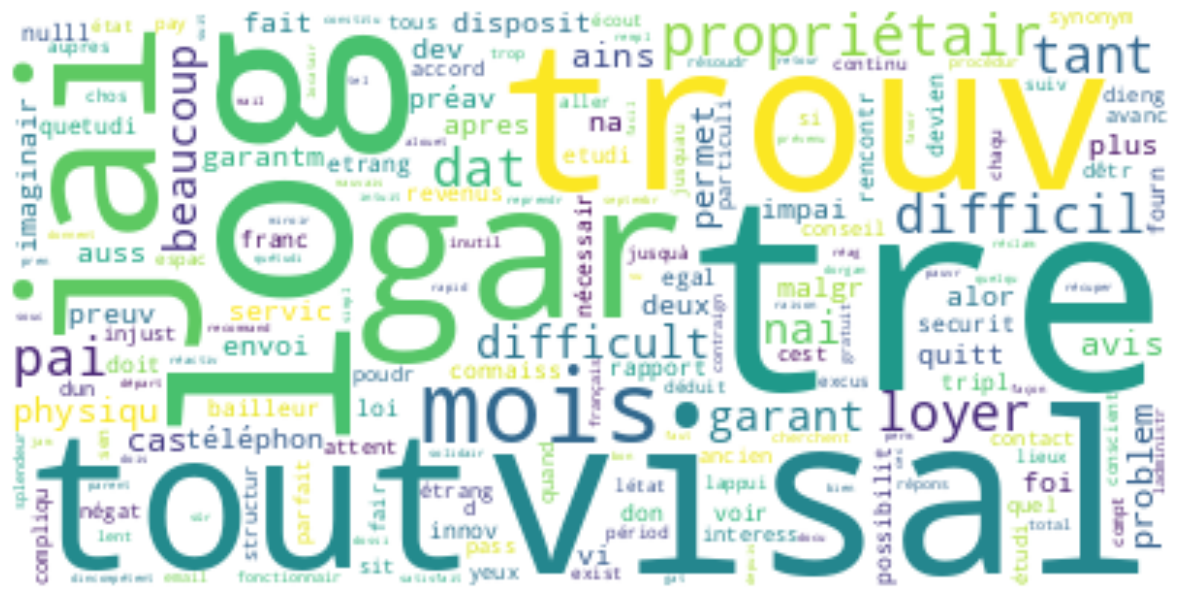

In [26]:
text = " ".join(i for i in data.Avis)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Avis"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Avis"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Avis"]]
data = data[["Avis", "Positive", "Negative", "Neutral"]]
print(data.head())

                                                Avis  Positive  Negative  \
0                                              nulll       0.0     0.000   
1  tant quetudi etrang nai connaiss franc  rencon...       0.0     0.105   
2                                           interess       0.0     0.000   
3               difficil trouv log tant étudi étrang       0.0     0.000   
4                  beaucoup difficult si gar physiqu       0.0     0.385   

   Neutral  
0    1.000  
1    0.895  
2    1.000  
3    1.000  
4    0.615  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


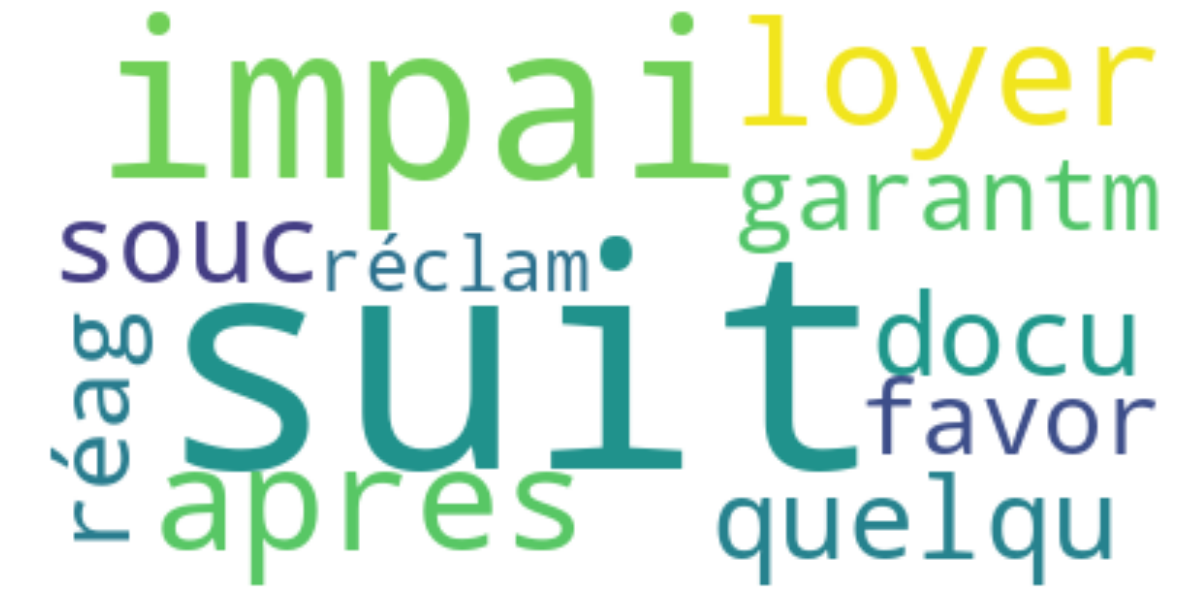

In [28]:
positive =' '.join([i for i in data['Avis'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

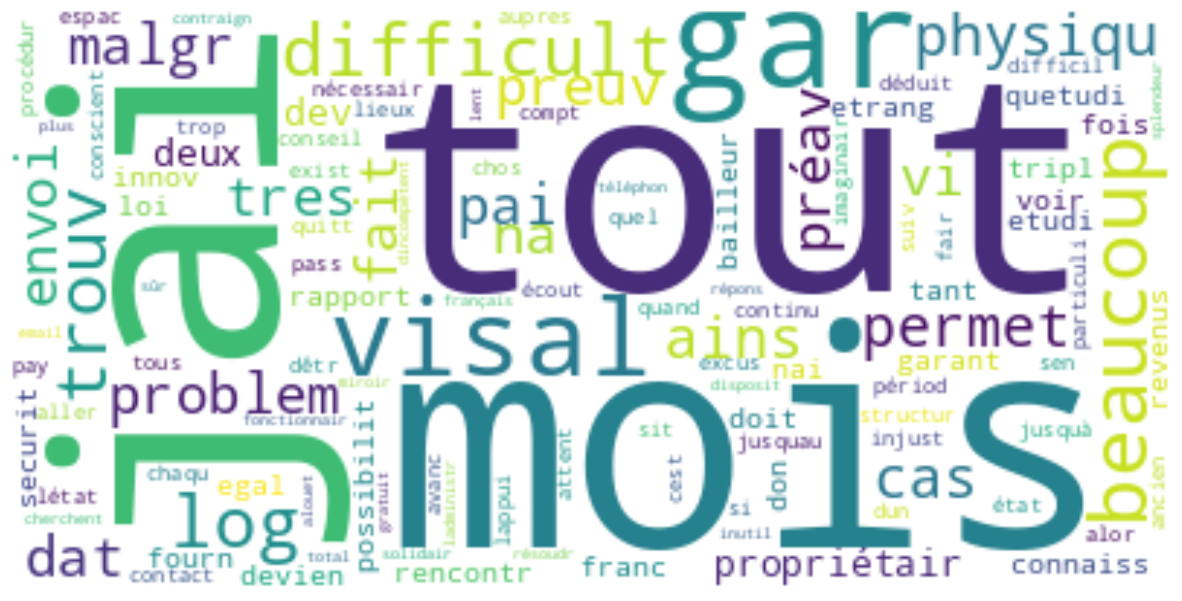

In [29]:
negative =' '.join([i for i in data['Avis'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()